# Task 1: Student Score Prediction
## *Description:*
- Dataset (Recommended): [Student Performance Factors (Kaggle)](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)
1. Build a model to predict students' exam scores based on their study hours.
2. Perform data cleaning and basic visualization to understand the dataset.
3. Split the dataset into training and testing set.
4. Train a linear regression model to estimate final scores.
5. Visualize predictions and evaluate model performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## summary statistics

In [3]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Missing data?

In [5]:
data.isna().sum().sum()

235

In [6]:
data.shape

(6607, 20)

In [7]:
print(f'Missing data percentage: {100 - (data.shape[0]-data.isna().sum().sum())/data.shape[0]*100:.2f}%')

Missing data percentage: 3.56%


- The missing data percentage is relatively small so we can drop it.

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.shape

(6378, 20)

In [10]:
data.isna().sum().sum()

0

## Number of Numerical Columns?

In [11]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 7


## Number of Categorical Columns?

In [12]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 13


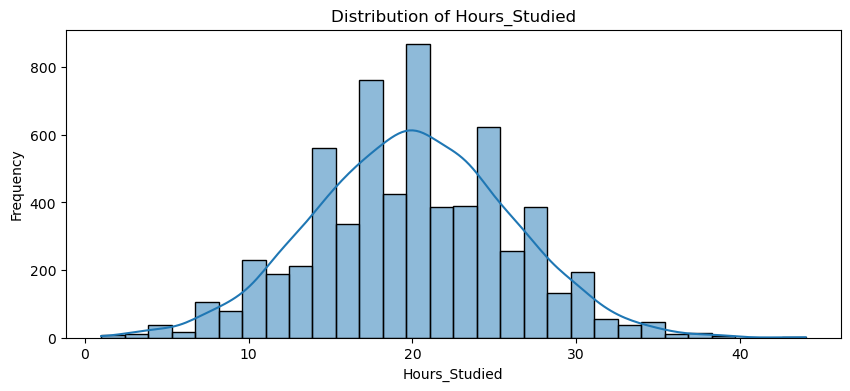

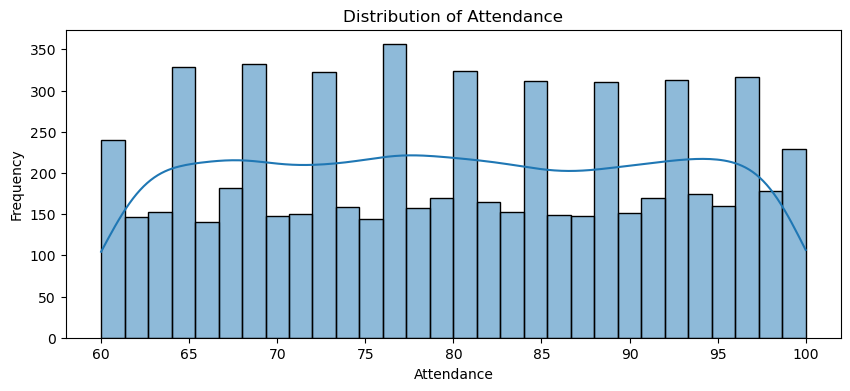

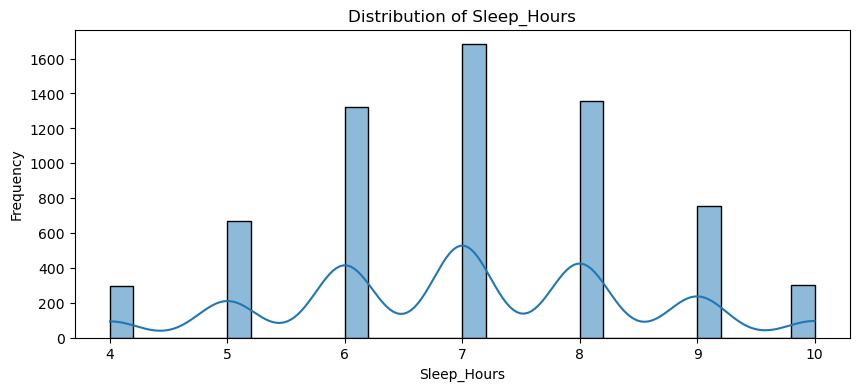

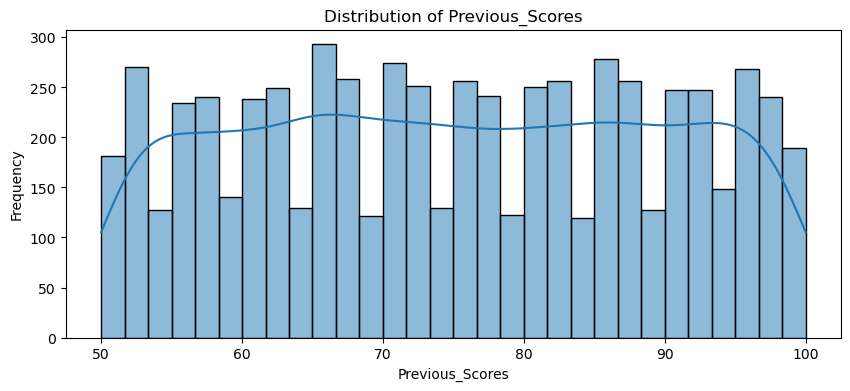

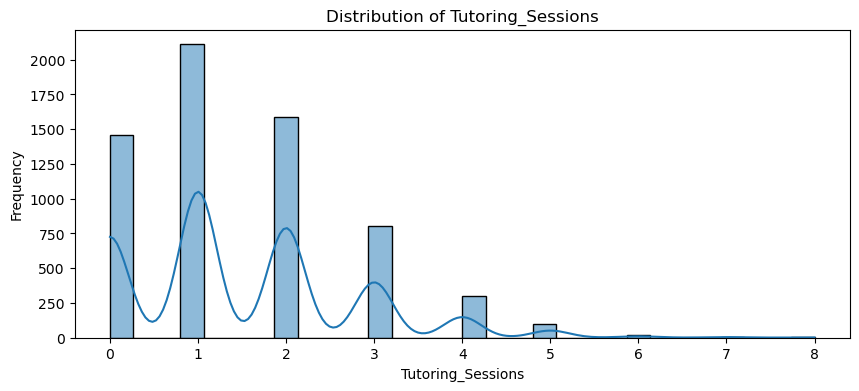

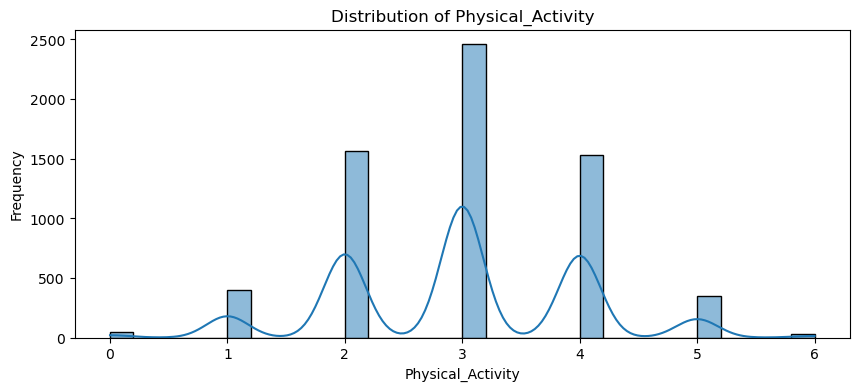

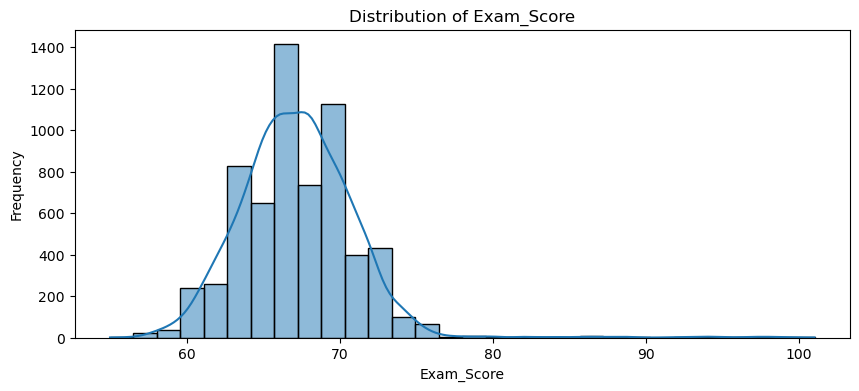

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

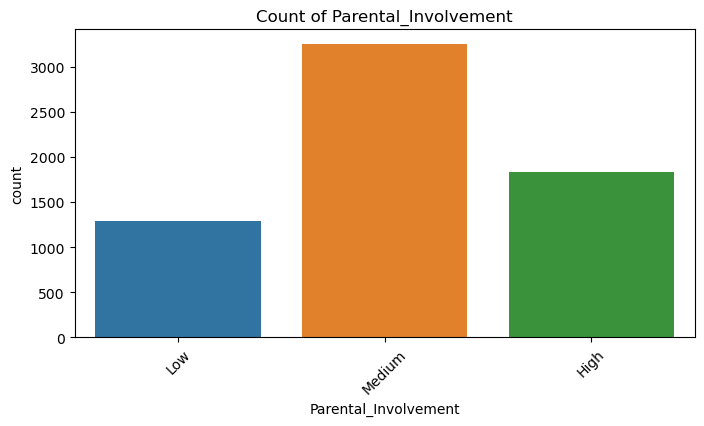

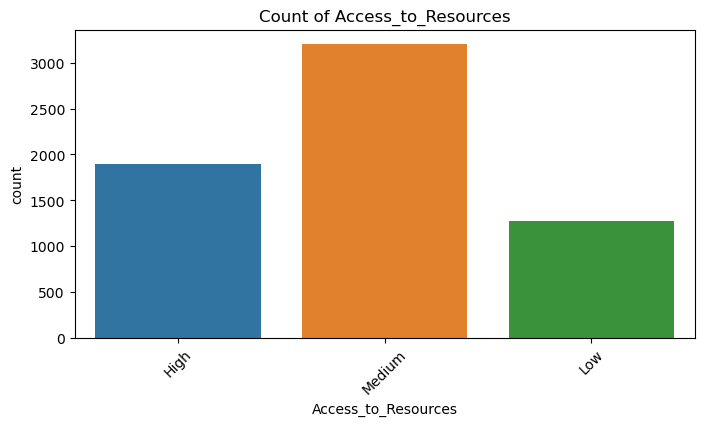

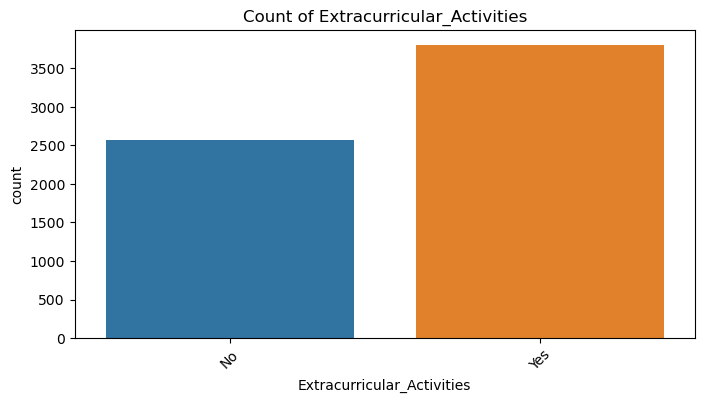

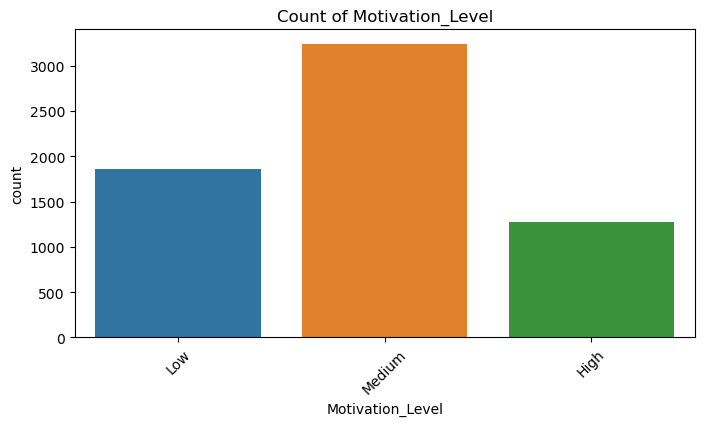

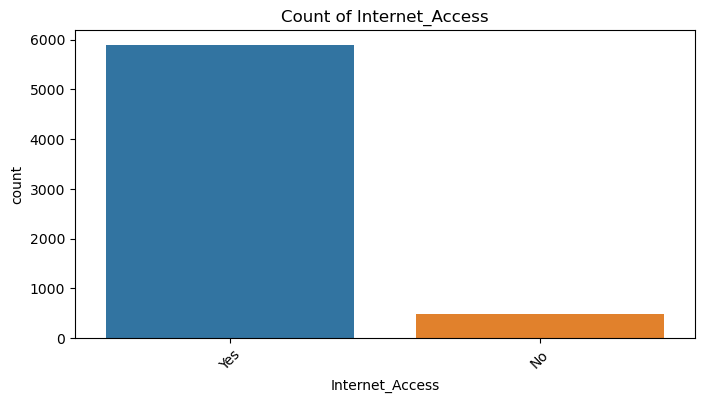

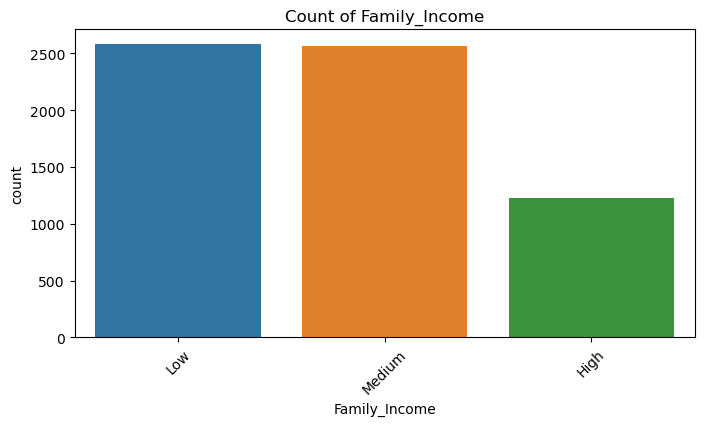

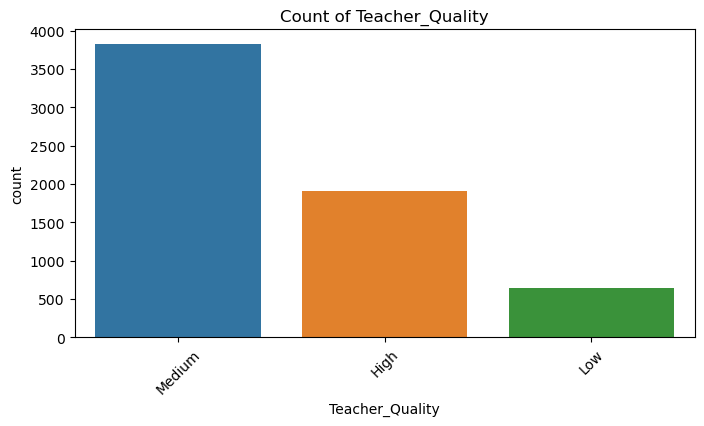

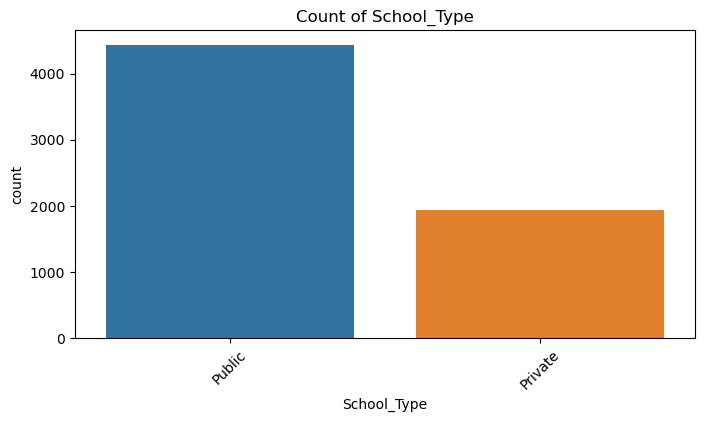

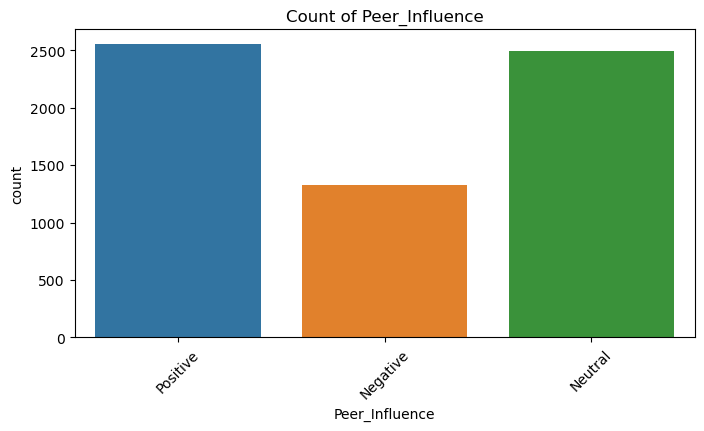

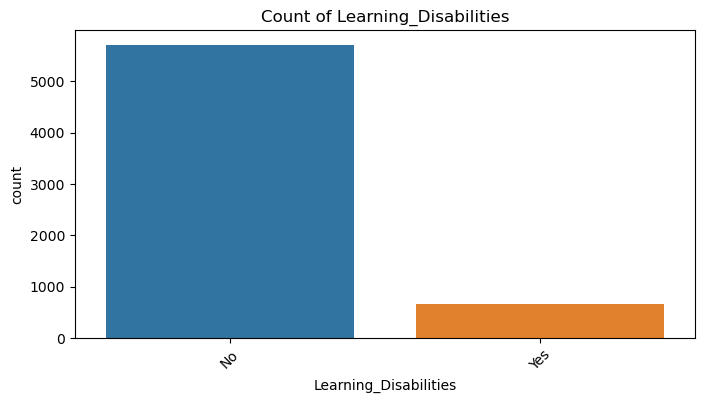

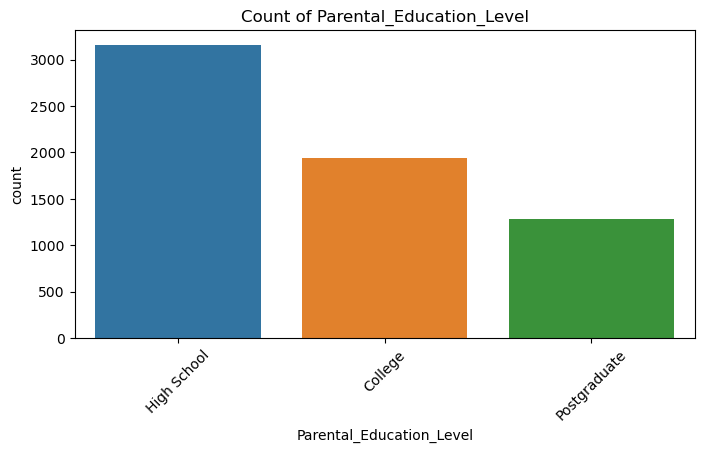

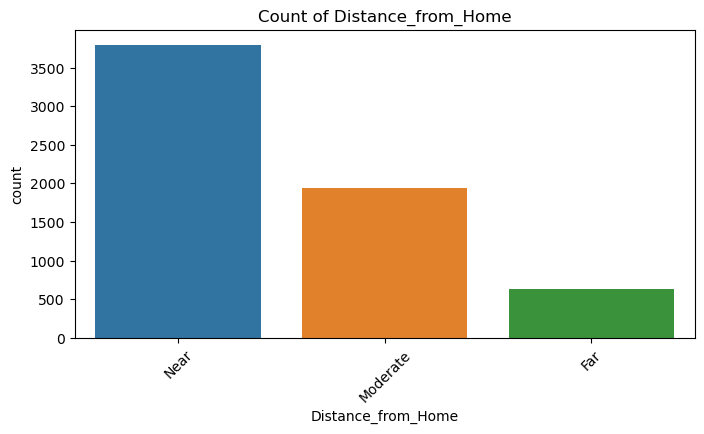

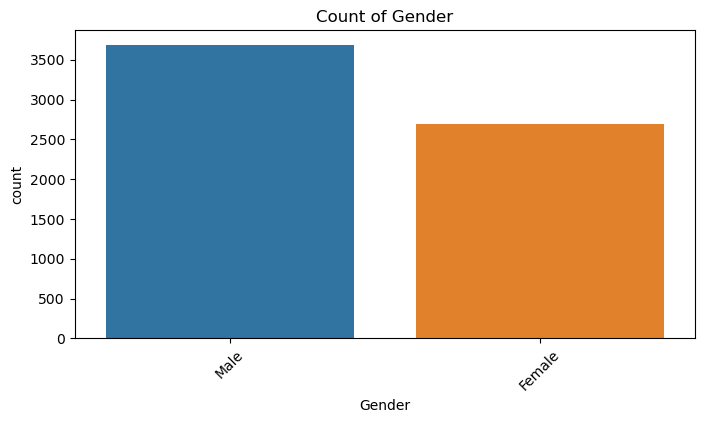

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Convert Categorical features to Numerical features by Label Encoder

In [15]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


## Check for outliers?
- Remove outliers identified using IQR

In [16]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

Number of outlier rows using IQR: 542


In [17]:
data_cleaned = data[~outliers_iqr]  

In [18]:
data_cleaned.shape

(5836, 20)

## Data splitting into training & testing

In [19]:
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']
Xo = data_cleaned.drop(columns=['Exam_Score'])
yo = data_cleaned['Exam_Score']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(Xo,yo,test_size=0.3,random_state=42)

In [21]:
model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(X_train,y_train)
model2.fit(X_train_o,y_train_o)

LinearRegression()

In [22]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test_o)

## Performance Metrics

In [23]:
mse1 = mean_squared_error(y_test, y_pred1)  
mse2 = mean_squared_error(y_test_o, y_pred2)  
r2_1 = r2_score(y_test, y_pred1)  
r2_2 = r2_score(y_test_o, y_pred2)  

In [24]:
print(f'Mean squared error with outliers: {mse1}')
print(f'R^2 score with outliers: {r2_1}')
print(f'Mean squared error with no outliers: {mse2}')
print(f'R^2 score with no outliers: {r2_2}')

Mean squared error with outliers: 5.08260798694127
R^2 score with outliers: 0.6677938760995381
Mean squared error with no outliers: 1.255329455964837
R^2 score with no outliers: 0.8750173041982847


## Visualize feature coefficients

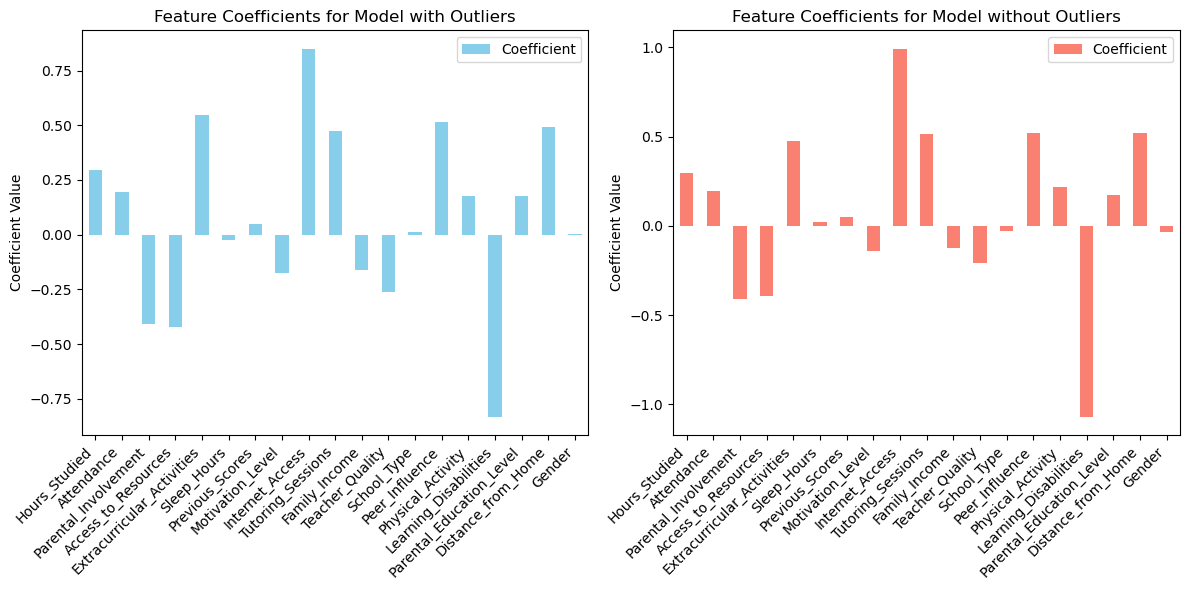

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
coefficients1 = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
coefficients1.plot(kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Feature Coefficients for Model with Outliers')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')  

plt.subplot(1, 2, 2)
coefficients2 = pd.DataFrame(model2.coef_, X.columns, columns=['Coefficient'])
coefficients2.plot(kind='bar', ax=plt.gca(), color='salmon')
plt.title('Feature Coefficients for Model without Outliers')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

## Residuals Plot

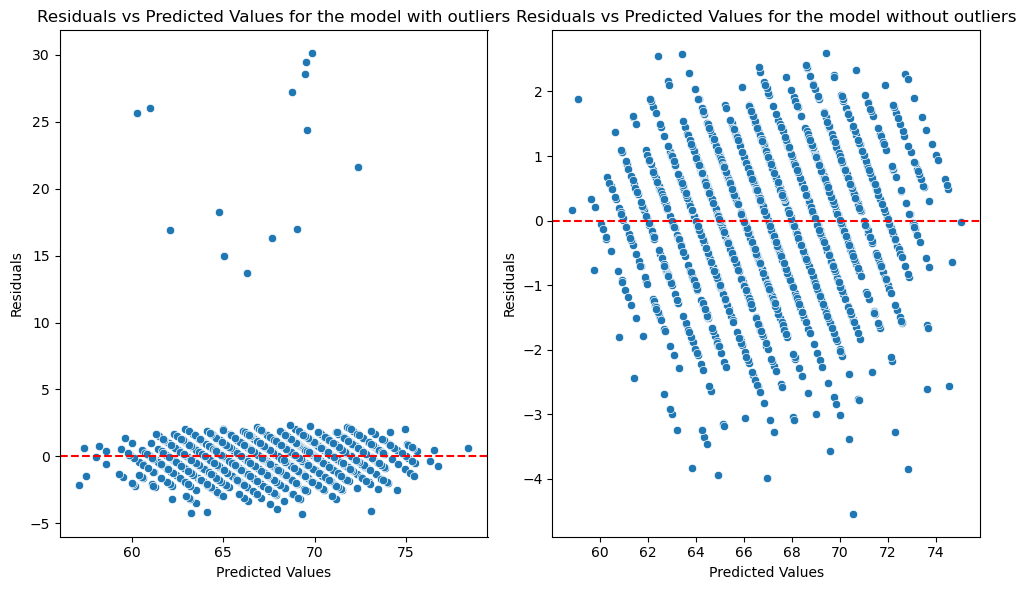

In [26]:
residuals1 = y_test - y_pred1
residuals2 = y_test_o - y_pred2

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for the model with outliers')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values for the model without outliers')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

## Comparison of the model performance with and without outliers

In [27]:
performance = pd.DataFrame({
    'Models' : ['Model1 with outliers', 'Model2 without outliers'],
    'mse': [mse1, mse2],
    'r2': [r2_1, r2_2]
})
performance

,Models,mse,r2
0,Model1 with outliers,5.082608,0.667794
1,Model2 without outliers,1.255329,0.875017
